In [1]:
%run ../input/python-recipes/cidhtml.py
%run ../input/python-recipes/danfo_csv.py
idhtml('Data & Code Modules')

In [2]:
import sklearn as sl,pandas as pd,numpy as np,pylab as pl
from sklearn.inspection import plot_partial_dependence
from sklearn.datasets import make_regression
from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor,Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
url='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
    'machine_learning_engineer_nd009/master/'+\
    'Machine_Learning_Engineer_ND_P3/customers.csv'
customers=pd.read_csv(url)
columns=['Fresh','Milk','Grocery','Frozen',
         'Detergents_Paper','Delicatessen']
danfo_table_csv(url,columns,11)

In [4]:
n_samples=1000; rng=np.random.RandomState(123)
X1=rng.randn(n_samples,3)
noise=rng.normal(loc=0.,scale=.5,size=n_samples)
y1=(2*X1[:,0]+np.sin(3*np.pi*X1[:,0])-noise)
X2,y2=make_regression(
    n_samples=1000,n_features=7,
    n_targets=3,random_state=1)

In [5]:
idhtml('Partial Dependence & Regression')

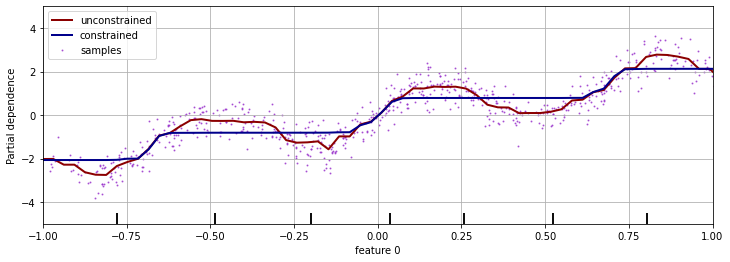

In [6]:
gbdt_no_cst=HistGradientBoostingRegressor().fit(X1,y1)
gbdt_cst=HistGradientBoostingRegressor(
    monotonic_cst=[1,0,0]).fit(X1,y1)
pl.rcParams['figure.figsize']=(12,4)
disp=plot_partial_dependence(
    gbdt_no_cst,X1,features=[0],feature_names=['feature 0'],
    line_kw={'linewidth':2,'color':'darkred','label':'unconstrained'})
plot_partial_dependence(
    gbdt_cst,X1,features=[0],ax=disp.axes_,
    line_kw={'linewidth':2,'color':'darkblue','label':'constrained'})
disp.axes_[0,0].plot(
    X1[:,0],y1,'o',ms=1,c='darkorchid',
    alpha=.7,zorder=-1,label='samples')
disp.axes_[0,0].set_ylim(-5,5); disp.axes_[0,0].set_xlim(-1,1)
pl.legend(); pl.grid();

In [7]:
idhtml('HuberRegressor vs Ridge & Strong Outliers')

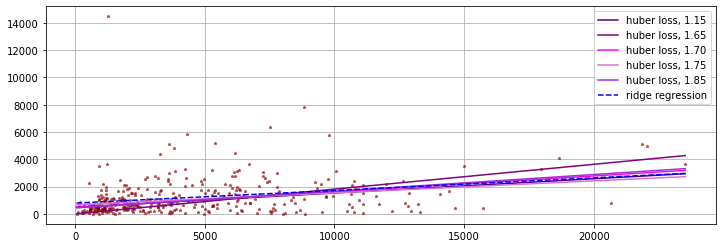

In [8]:
customers_cond=customers[customers<25000].dropna()
X=customers_cond.Milk.values.reshape(-1,1)
y=customers_cond.Delicatessen.values
pl.figure(figsize=(12,4))
pl.plot(X,y,'o',c='darkred',ms=3,marker='*',alpha=.5)
x=np.linspace(X.min(),X.max(),7)
colors=['indigo','purple','magenta',
        'orchid','darkorchid']
epsilon_values=[1.15,1.65,1.7,1.75,1.85]
for k,epsilon in enumerate(epsilon_values):
    huber=HuberRegressor(alpha=0.,epsilon=epsilon)
    huber.fit(X,y)
    coef_=huber.coef_*x+huber.intercept_
    pl.plot(x,coef_,colors[k],
            label='huber loss, %.2f'%epsilon)
ridge=Ridge(alpha=0.,random_state=0,normalize=True)
ridge.fit(X,y)
coef_ridge=ridge.coef_
coef_=ridge.coef_ *x+ridge.intercept_
pl.plot(x,coef_,'blue',ls='--',label='ridge regression')
pl.grid(); pl.legend();

In [9]:
idhtml('Multioutput Toy Regression')

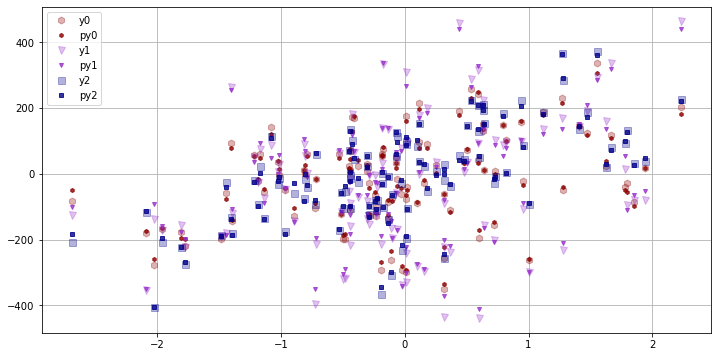

In [10]:
pl.figure(figsize=(12,6))
colors=['darkred','darkorchid','darkblue']
markers=['h','v','s']
m=100
py2=MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0))\
    .fit(X2,y2).predict(X2)
for i in range(3):
    pl.plot(X2[:m,0],y2[:m,i],'o',c=colors[i],
            ms=7,marker=markers[i],alpha=.3,
            label='y%d'%i)
    pl.plot(X2[:m,0],py2[:m,i],'o',c=colors[i],
            ms=4,marker=markers[i],alpha=.8,
            label='py%d'%i)
pl.grid(); pl.legend();

In [11]:
idhtml('Multioutput Real Regression')

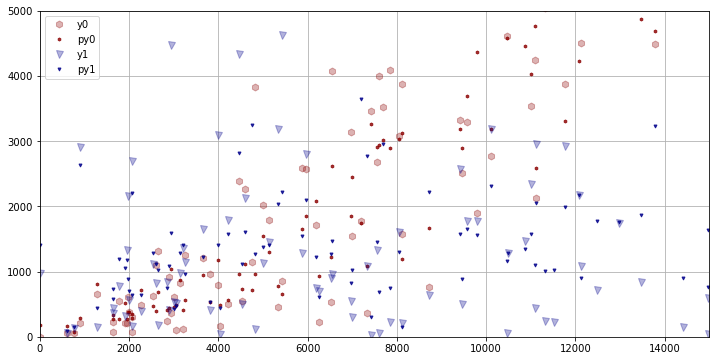

In [12]:
customers=customers.dropna()
X=customers.iloc[:,int(2):int(6)].values
y=customers.iloc[:,int(6):].values
pl.figure(figsize=(12,6))
colors=['darkred','darkblue']
markers=['h','v']; m=100
py=MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0))\
    .fit(X,y).predict(X)
for i in range(2):
    pl.plot(X[:m,2],y[:m,i],'o',c=colors[i],
            ms=7,marker=markers[i],alpha=.3,
            label='y%d'%i)
    pl.plot(X[:m,2],py[:m,i],'o',c=colors[i],
            ms=3,marker=markers[i],alpha=.8,
            label='py%d'%i)
pl.xlim(0,15000); pl.ylim(0,5000)
pl.legend(); pl.grid();

In [13]:
idhtml('Robust Scaling')

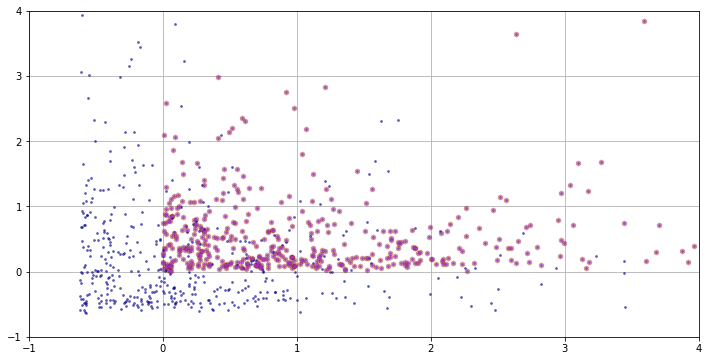

In [14]:
X=customers.iloc[:,int(2):].values
robust_scaler=RobustScaler().fit(X)
X_rs=robust_scaler.transform(X)
X_irs=robust_scaler.inverse_transform(X_rs)
pl.figure(figsize=(12,6))
pl.plot(X[:,0]/10**4,X[:,1]/10**4,'o',c='darkred',
        ms=5,marker='h',alpha=.3,label='real data')
pl.plot(X_rs[:,0],X_rs[:,1],'o',c='darkblue',
        ms=2,marker='h',alpha=.5,label='robust scaler')
pl.plot(X_irs[:,0]/10**4,X_irs[:,1]/10**4,'o',c='darkorchid',
        ms=2,marker='h',alpha=.7,label='inversed data')
pl.xlim(-1,4); pl.ylim(-1,4); pl.grid();

In [15]:
idhtml('Robust Scaling & Multioutput Regression')

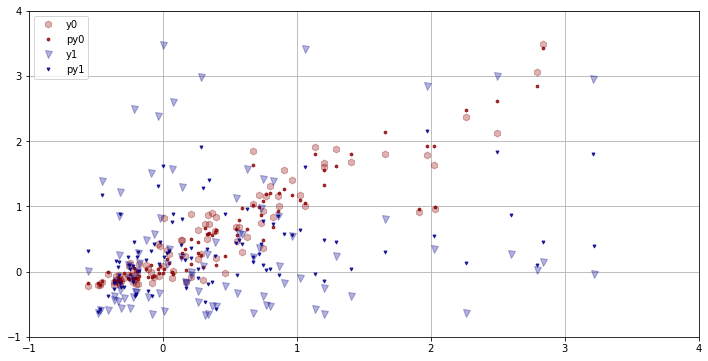

In [16]:
X,y=X_rs[:,:int(4)],X_rs[:,int(4):]
pl.figure(figsize=(12,6))
colors=['darkred','darkblue']
markers=['h','v']; m=100
py=MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0))\
    .fit(X,y).predict(X)
for i in range(2):
    pl.plot(X[:m,2],y[:m,i],'o',c=colors[i],
            ms=7,marker=markers[i],alpha=.3,
            label='y%d'%i)
    pl.plot(X[:m,2],py[:m,i],'o',c=colors[i],
            ms=3,marker=markers[i],alpha=.8,
            label='py%d'%i)
pl.grid(); pl.xlim(-1,4); pl.ylim(-1,4); pl.legend();